# Preprocessing The Data

## Image classification
In this project, we will build a convolutional neural network to solve a multiclass image classification problem.

For this, we'll use the “UrbanSounds8K” dataset. It includes 8732 sounds that belong to 10 classes. The spectrograms of the audio files will be processed.

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Import for features(x)
import glob
from PIL import Image
from numpy import asarray
import numpy as np

#Import for labels(y)
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Dataset
Dataset is not labeled by folder names rather than it contains labeled csv file. In order to make normalization, grayscale and resizing process you need to unfold all spectrograms. Spectrogram images is going to be features(x) and csv file's class column is going to be labels(y). BY using X and Y, assign the corresponding variables to the *X_train*, *y_train*, *X_test*, and *y_test*.

In [ ]:
import cv2
import glob
from PIL import Image
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt

files=glob.glob("/content/drive/MyDrive/spectrogramss/*.png")
feature=[]#boş liste tanımlamak boş np.array üzerinde çalışmaktan daha iyidir. dolu listeyi sonradan np.array'e çevirebilirsin.
for file in files:
    #print(file)
    image = Image.open(file)#upload image
    numpydata = asarray(image)#turn image into numpy.array
    #imgGray = cv2.cvtColor(numpydata, cv2.COLOR_BGR2GRAY)  # grayscale image
    imgResize = cv2.resize(numpydata, (100, 100))#resize image
    final = imgResize / 255#normalization on image
    feature.append(final)#append to feature list
feature=np.array(feature)
print(len(feature))
print(feature.shape)

8732
(8732, 100, 100, 4)


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/UrbanSound8K.csv")
temp=data.loc[:,"class"]
label=temp.replace(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'],[0,1,2,3,4,5,6,7,8,9])

#print(label)
print(label.unique())
label=np.array(label)
print(label.shape)
print(type(label))

[3 2 1 0 9 6 8 5 7 4]
(8732,)
<class 'numpy.ndarray'>


In [ ]:
x=feature
y=label

In [ ]:
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
x_train, x_temporary, y_train, y_temporary=train_test_split(x,y,train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validaiton and test datasets.
x_val, x_test, y_val,y_test=train_test_split(x_temporary,y_temporary,train_size=0.5)

Now, we can print the the number of samples in the X_train, X_test,x_val,x datasets to see how the dataset is distributed.

📌 Use f-strings for this.

In [ ]:
# Print the number of samples 
print(f'length of the dataset:{len(x)}')
print(f'length of the training dataset:{len(x_train)}')
print(f'length of the validation dataset:{len(x_val)}')
print(f'length of the test dataset:{len(x_test)}')

length of the dataset:8732
length of the training dataset:6985
length of the validation dataset:873
length of the test dataset:874


Before we move on with the creating CNN model, we can print a random sample to see what the data looks like.

📌 Convert the pixel values into an image by using the *imshow()* function of the Matplotlib library. 

📌 Print the shape of the image using *shape*.

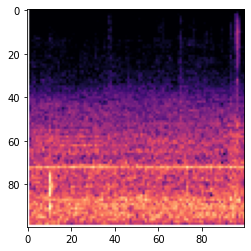

(100, 100, 4)
4


In [ ]:
# Use the .imshow() function and show the plot
chosen=100
plt.imshow(x[chosen])
plt.show()
# Print the shape of the sample image
print(x_test[chosen].shape)
print(y_test[chosen])

#plt.imshow(x_train[chosen])
#plt.show()
#print(y_train[chosen])
#plt.imshow(x[chosen])
#plt.show()
#print(y[chosen])

Saving the necessary datasets for model

In [ ]:
#np.save("x.npy",x)
#np.save("y.npy",y)
np.save("/content/drive/MyDrive/datasets/x_train.npy",x_train)
np.save("/content/drive/MyDrive/datasets/y_train.npy",y_train)
np.save("/content/drive/MyDrive/datasets/x_val.npy",x_val)
np.save("/content/drive/MyDrive/datasets/y_val.npy",y_val)
np.save("/content/drive/MyDrive/datasets/x_test.npy",x_test)
np.save("/content/drive/MyDrive/datasets/y_test.npy",y_test)
#x=np.load("x.npy")
#y=np.load("y.npy")